# HuggingFace Tokenizer

## Create Custom Tokenizer and Save it as JSON

In [ ]:
from tokenizers import Tokenizer, models, pre_tokenizers, trainers

'''Training'''
# Read the dataset from a file
with open("/Users/premtimsina/Documents/bpbbook/chapter2_huggingFace/datasets/tokenizer_train.txt", "r") as file:
    dataset = [line.strip() for line in file.readlines()]

# Initialize a BPE tokenizer
tokenizer = Tokenizer(models.BPE())

# Set the pre-tokenizer to split the input into words
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# Train the BPE tokenizer on the dataset
trainer = trainers.BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.train_from_iterator(dataset, trainer=trainer)
tokenizer.save("/Users/premtimsina/Documents/bpbbook/chapter2_huggingFace/model/tokenizer.json")


## Load the Tokenizer from File and conduct Tokenization

In [ ]:
'''Inference'''
from transformers import PreTrainedTokenizerFast
fast_tokenizer = PreTrainedTokenizerFast(tokenizer_file="/Users/premtimsina/Documents/bpbbook/chapter2_huggingFace/model/tokenizer.json")
text = "The Tokenizers"
encoded = tokenizer.encode(text)

# Print the tokenized text
print(encoded.tokens)

['T', 'h', 'e', 'T', 'o', 'ken', 'iz', 'ers']


## Visualize Tokenization

In [ ]:
from tokenizers.tools import EncodingVisualizer
# Visualize the tokenization process
visualizer = EncodingVisualizer(fast_tokenizer._tokenizer)
visualizer(text="The Tokenizers")

# HuggingFace Pre-Trained Tokenizer

In [ ]:

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
print( tokenizer.tokenize("The tokenizers") )

['the', 'token', '##izer', '##s']


# HuggingFace Dataset
## Loading Pre-built Dataset

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

# Load the IMDb movie review dataset
imdb_dataset = load_dataset("imdb")

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Select a sample text from the dataset
sample_text = imdb_dataset["test"][0]["text"]
print (sample_text)

Found cached dataset imdb (/Users/premtimsina/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


  0%|          | 0/3 [00:00<?, ?it/s]

I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they have to alway

## Using Pre-built Dataset for Sentiment Analysis

In [ ]:
from transformers import  AutoModelForSequenceClassification, pipeline
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_analysis_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
# Select a sample text from the dataset
sample_text = imdb_dataset["test"][0]["text"]

# Perform sentiment analysis on the sample text
result = sentiment_analysis_pipeline(sample_text)

# Print the result
print("Sample Text:", sample_text)
print("Sentiment Analysis Result:", result)

Sample Text: I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they 

## Converting HuggingFace Dataset to PyTorch Tensor
There are two ways to achieve this:

1. First, by converting the data to a PyTorch tensor using `.with_format("torch")`
2. Second, by creating a custom dataset class.
We will explore both approaches.


### 1. Convert to PyTorch Tensor using `.with_format("torch")

In [ ]:
from datasets import load_dataset
from torch.utils.data import DataLoader, Dataset
import torch

# Load the HuggingFace dataset (IMDb movie review dataset as an example)
imdb_dataset = load_dataset("imdb").with_format("torch")
print (type(imdb_dataset['train']))


Found cached dataset imdb (/Users/premtimsina/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


  0%|          | 0/3 [00:00<?, ?it/s]

<class 'datasets.arrow_dataset.Dataset'>


Note: `.with_format("torch")` will convert the data into PyTorch Tensor. This can be directly fed to PyTorch DataLoader

### Reviewing the prebuilt dataset

In [ ]:
from datasets import DatasetInfo
DatasetInfo(imdb_dataset)

DatasetInfo(description=DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
}), citation='', homepage='', license='', features=None, post_processed=None, supervised_keys=None, task_templates=None, builder_name=None, config_name=None, version=None, splits=None, download_checksums=None, download_size=None, post_processing_size=None, dataset_size=None, size_in_bytes=None)

In [ ]:
imdb_train=imdb_dataset['train']
imdb_train[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

### 2. By Creating PyTorch CustomDataset





In [ ]:
from datasets import load_dataset
from torch.utils.data import DataLoader, Dataset
import torch

# Load the HuggingFace dataset
imdb_dataset = load_dataset("imdb")

# Preprocess the dataset and return the list of dictionary. The dictionary contains text and label.
# Each dictionary corresponds to one row
def preprocess(data):
    dataset = []
    for example in data:
        text = example["text"].lower()
        label = example["label"]
        dataset.append({"text": text, "label": label})
    return dataset

# create train data
train_data = preprocess(imdb_dataset["train"])


Found cached dataset imdb (/Users/premtimsina/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#Create CustomDataset class inheriting torch.utils.data.Dataset
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
# This will create
train_dataset = CustomDataset(train_data)


In [ ]:
train_dataset[0]

{'text': 'i rented i am curious-yellow from my video store because of all the controversy that surrounded it when it was first released in 1967. i also heard that at first it was seized by u.s. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" i really had to see this for myself.<br /><br />the plot is centered around a young swedish drama student named lena who wants to learn everything she can about life. in particular she wants to focus her attentions to making some sort of documentary on what the average swede thought about certain political issues such as the vietnam war and race issues in the united states. in between asking politicians and ordinary denizens of stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />what kills me about i am curious-yellow is that 40 years ago, this was considered pornographic. really, the sex and nudity scenes are few and far be

# Sharing your model
1. Create account in huggingface:
[https://huggingface.co/join](https://huggingface.co/join)
2. Create a new model
[https://huggingface.co/new](https://huggingface.co/new)
3. Upload the code
4. Edit Model Cart
5. Create space via gradio

## 1. Create account in huggingface:
* Go to the link and create account:https://huggingface.co/join
* There is no charge to create account
  1. you just need email id
  2. you do not need credit **card**

## 2. Create a new model
* Go to the link [https://huggingface.co/new](https://huggingface.co/new) and fill the details.*italicized text*

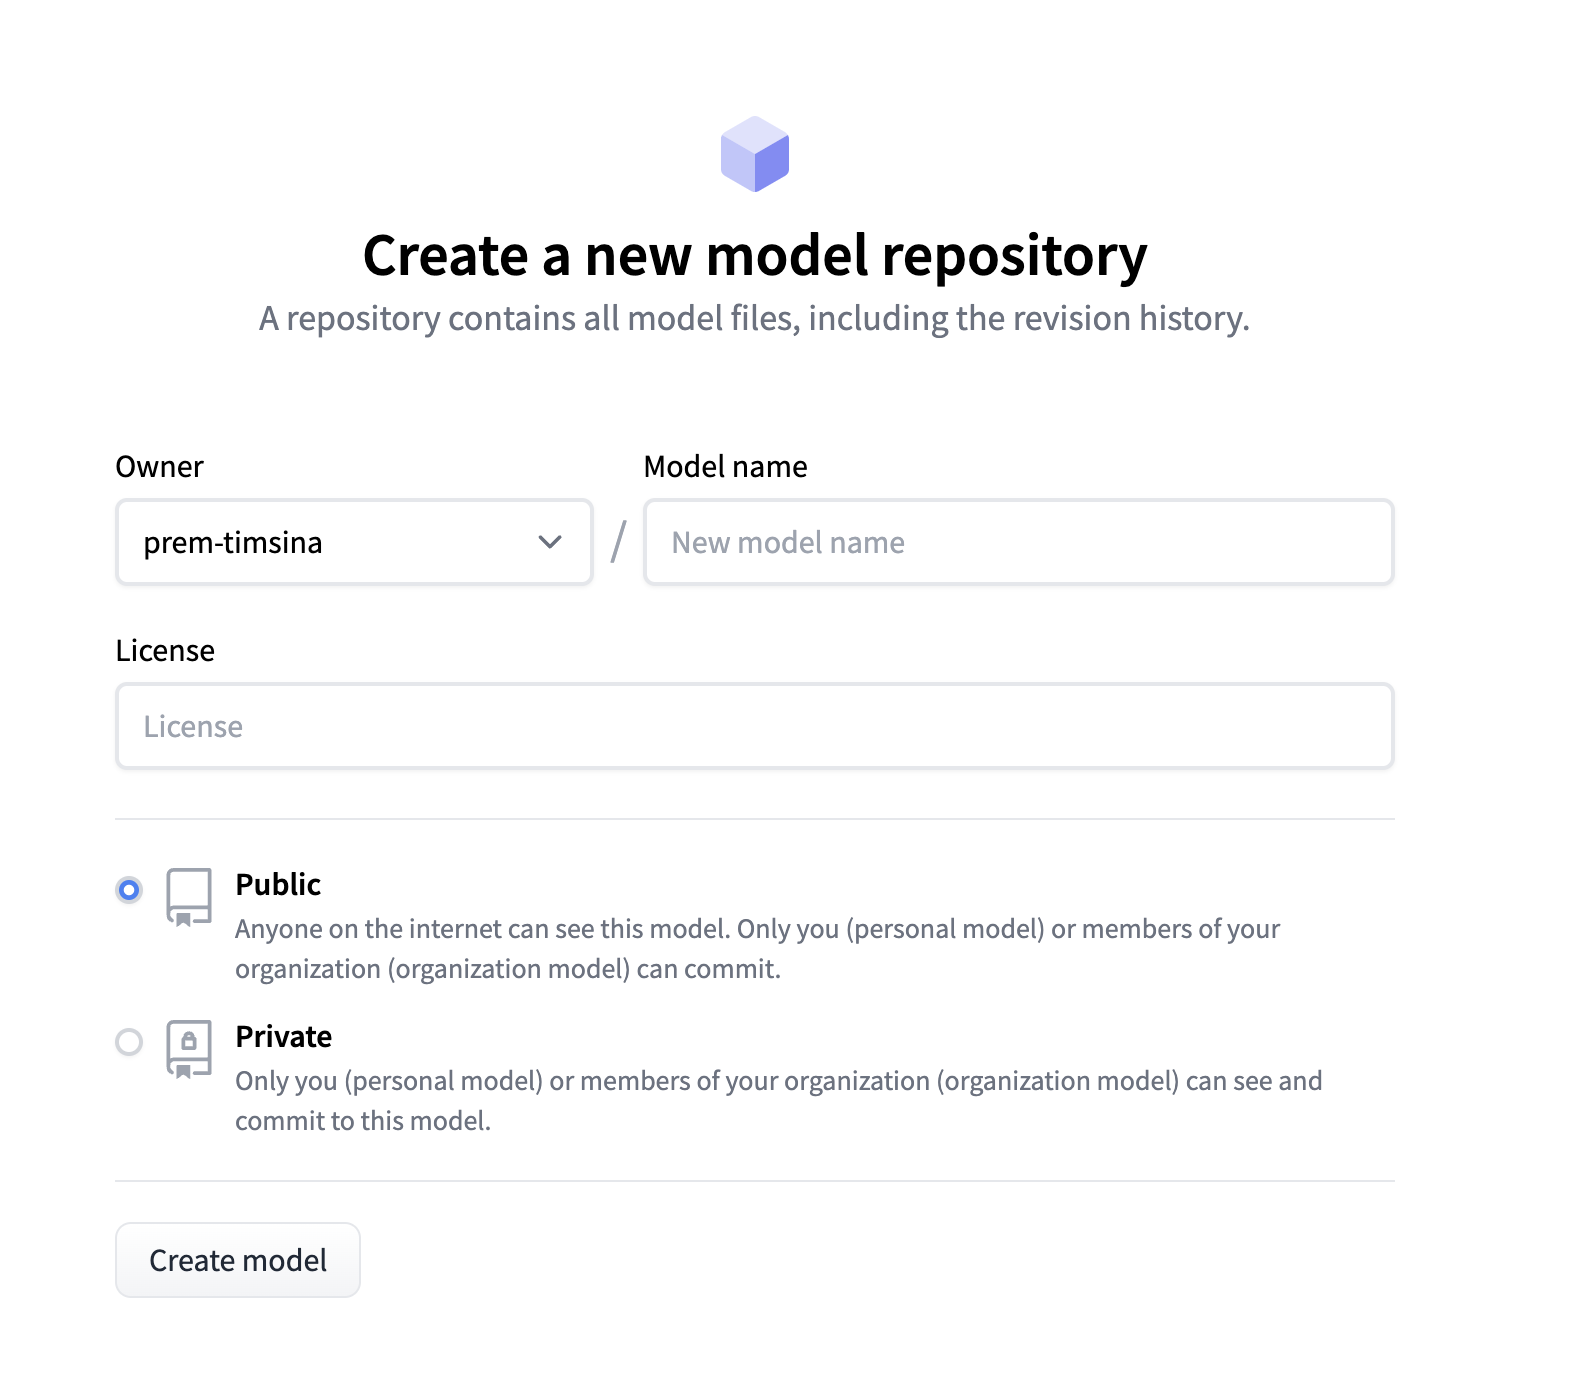

##3. Upload Codes
* Upload all the necessary files and directories and make sure to provide the required license. You can easily drag and drop the files to upload them.
* Specifically for the project we worked on in this chapter, ensure that you upload the designated files and directories.
  1. feature_extractor
  2. model_index.json
  3. safety_checker
  4. scheduler
  5. text_encoder
  6. tokenizer
  7. unet
  8. vae

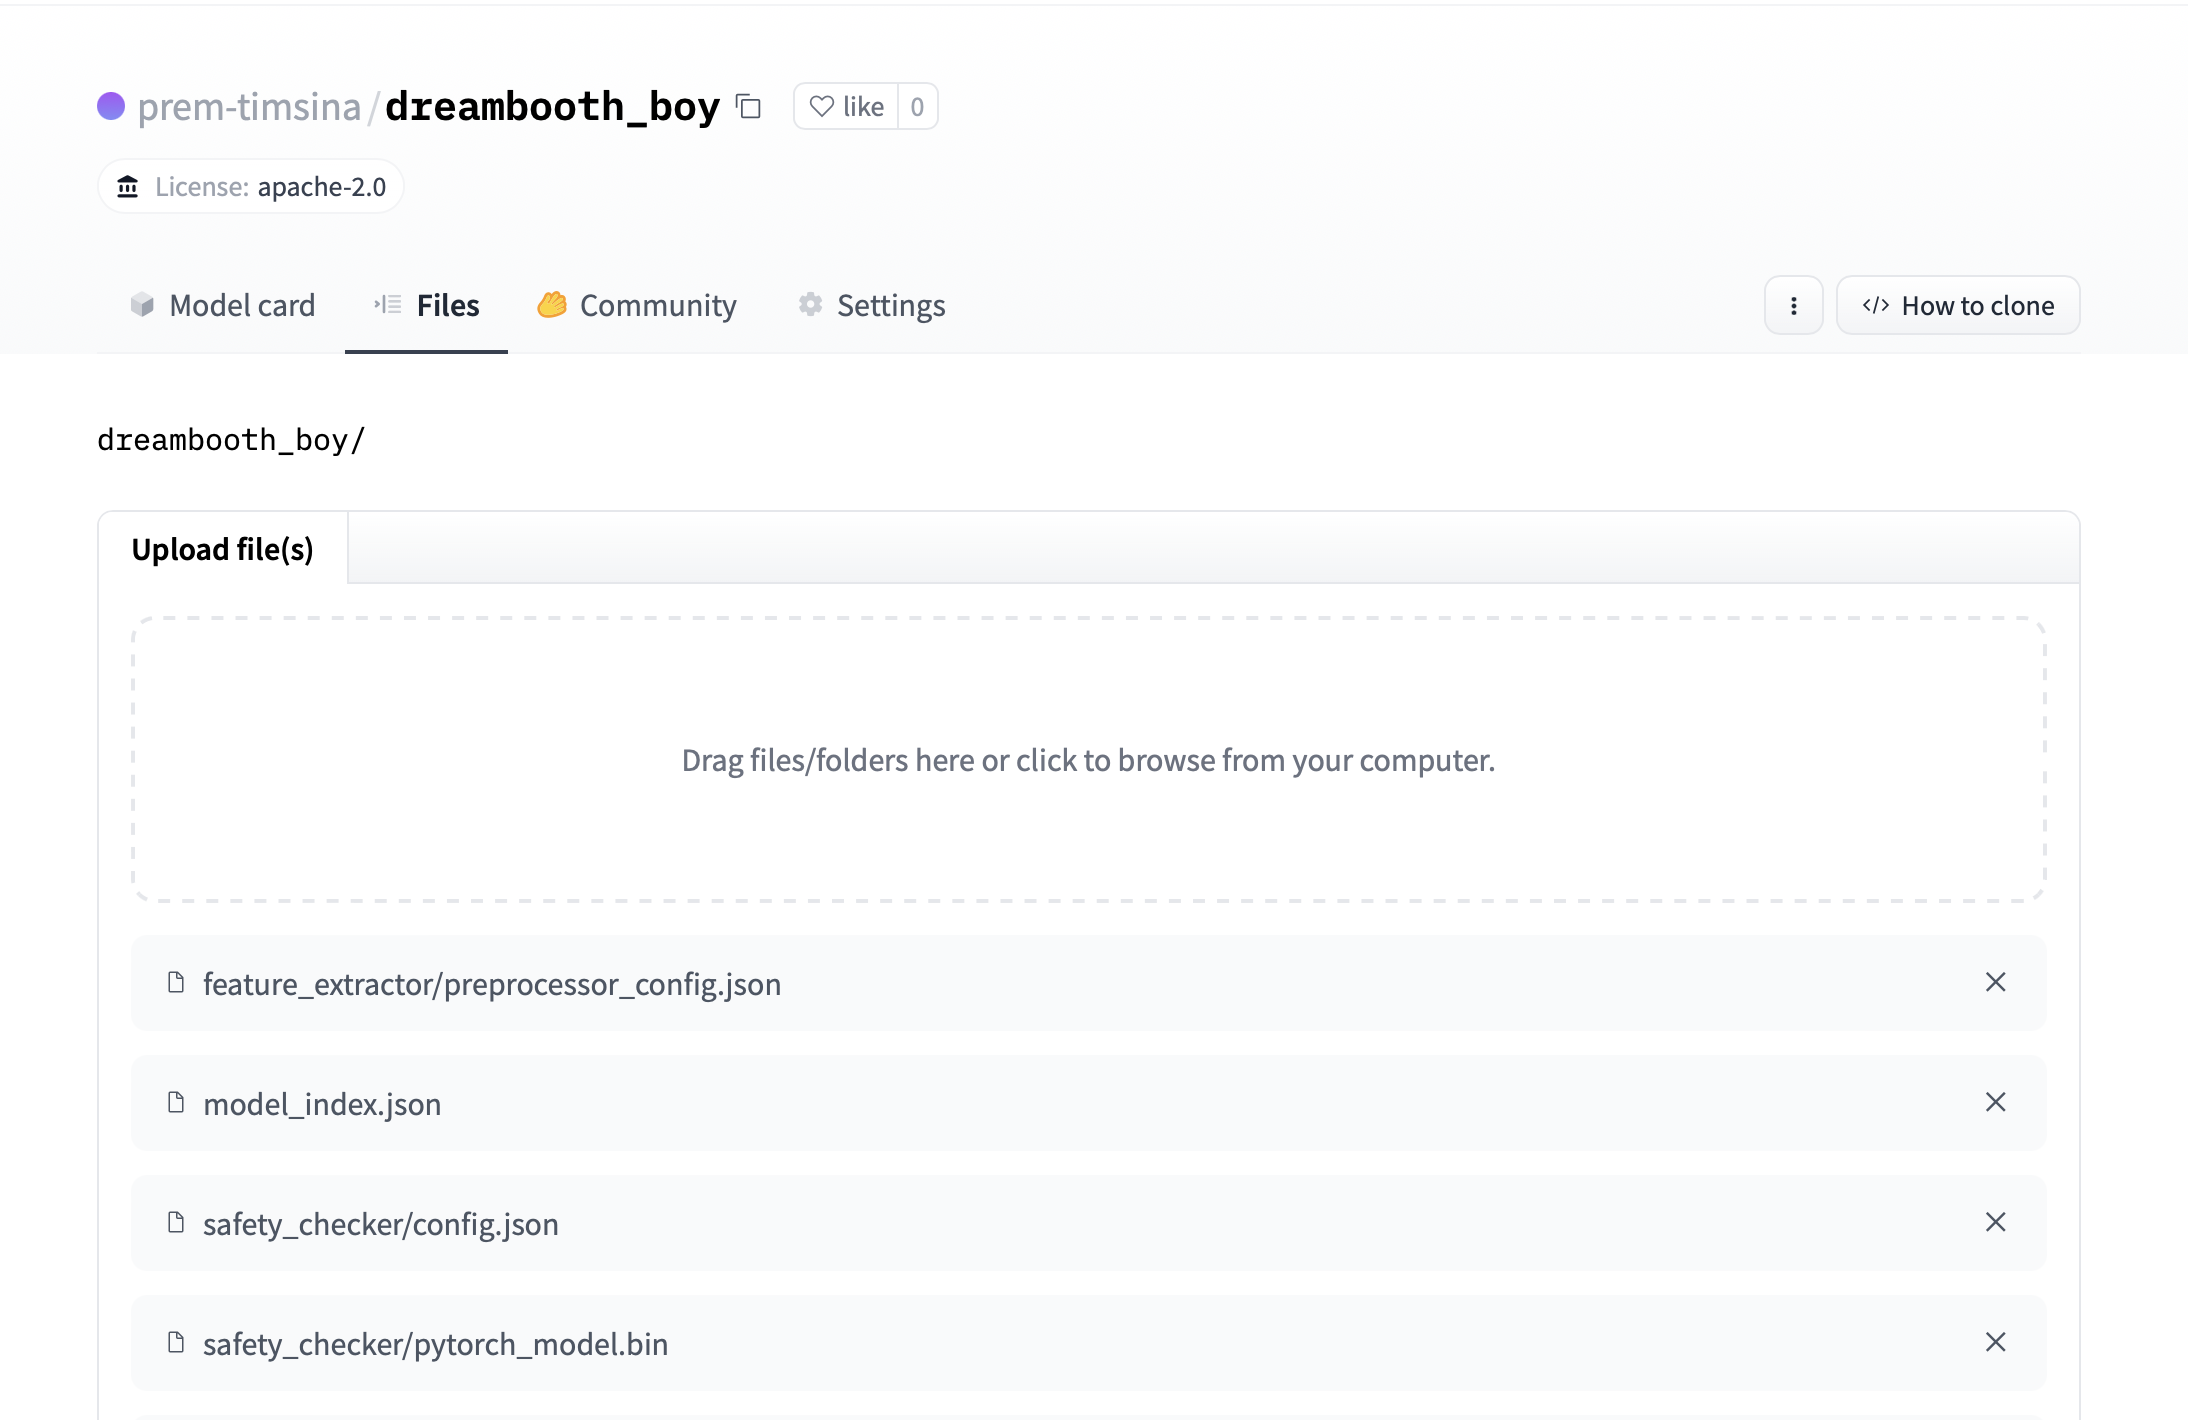

## 4. Edit the model card
As shown in the below picture: You can click **Edit Model card**

Below is an example of a simple model card.
```
---
license: apache-2.0
language:
- en
library_name: diffusers
pipeline_tag: text-to-image
---
```


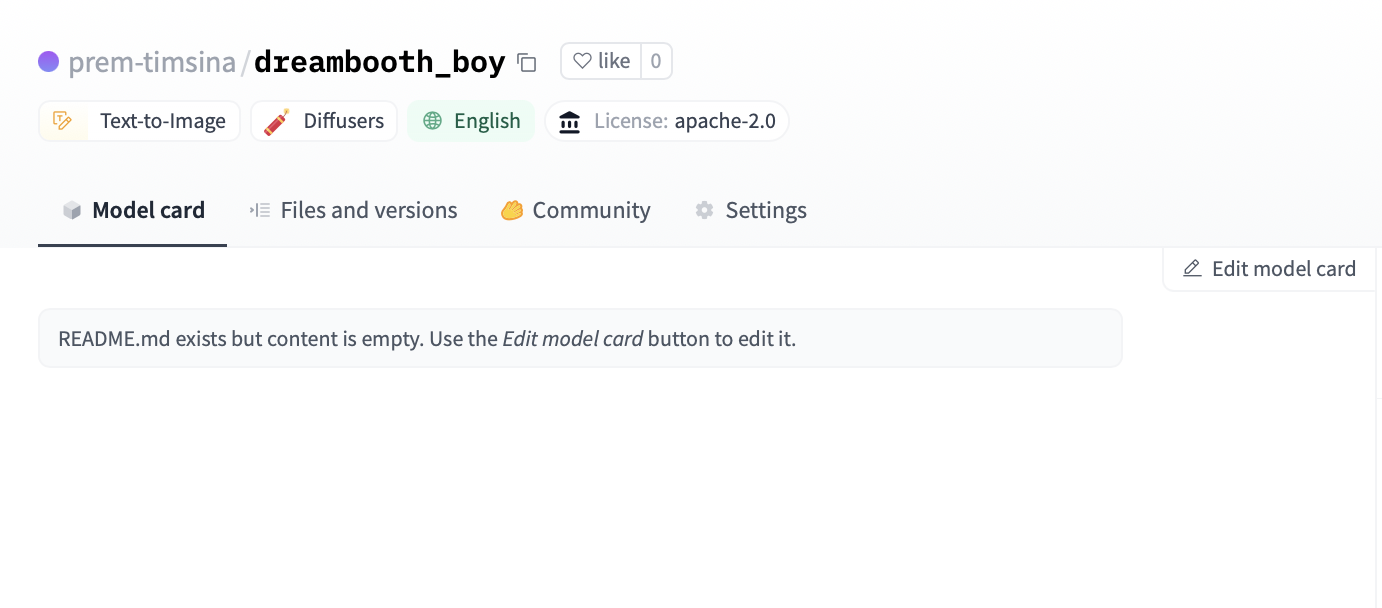



---
# **Congratulations, your model is now available on Hugging Face!**

---




After successfully editing the model card, Hugging Face will automatically provide you with the Hosted Inference API, which is displayed as shown in the diagram below.


---


---




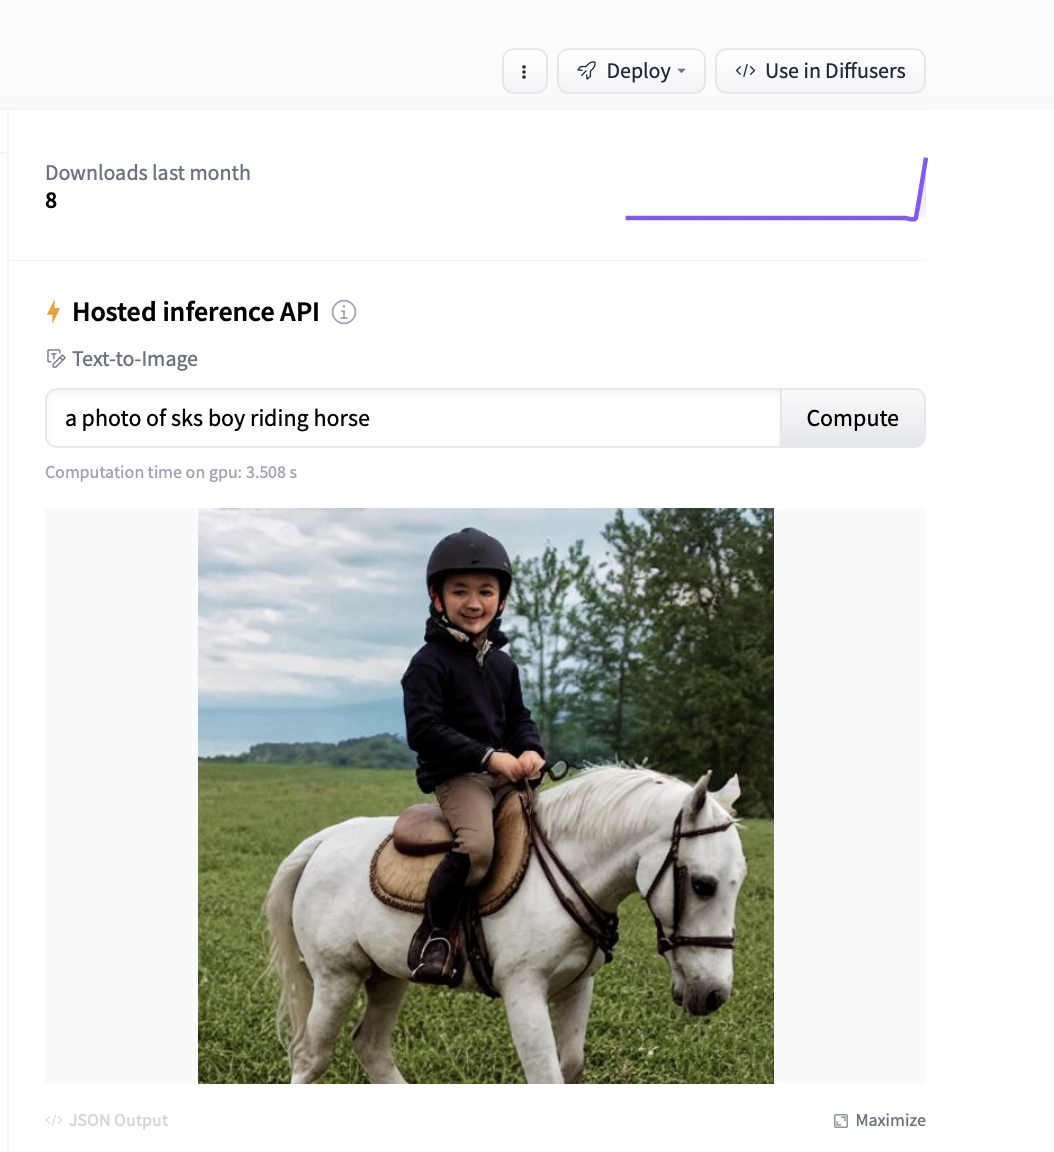

## 5. Now lets create Spaces
 First click on the Deploy ==> Spaces as shown in below picture

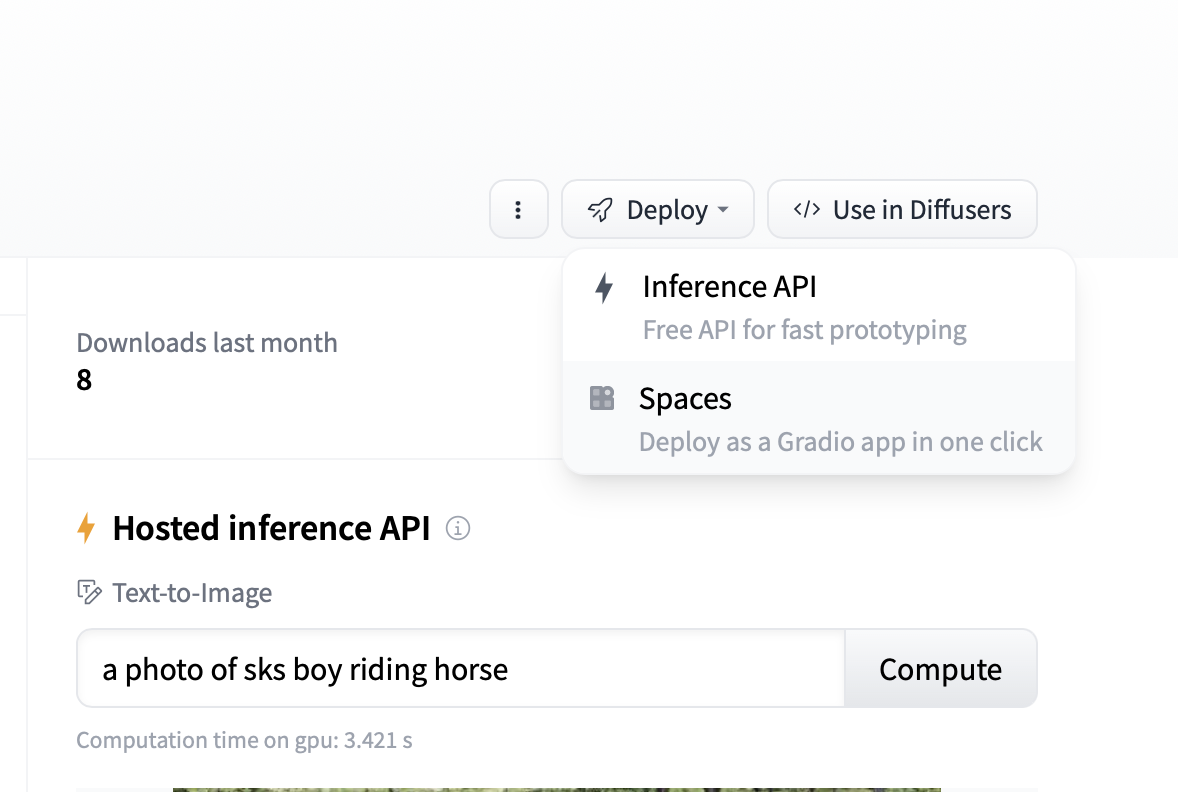

### Fill out the details:
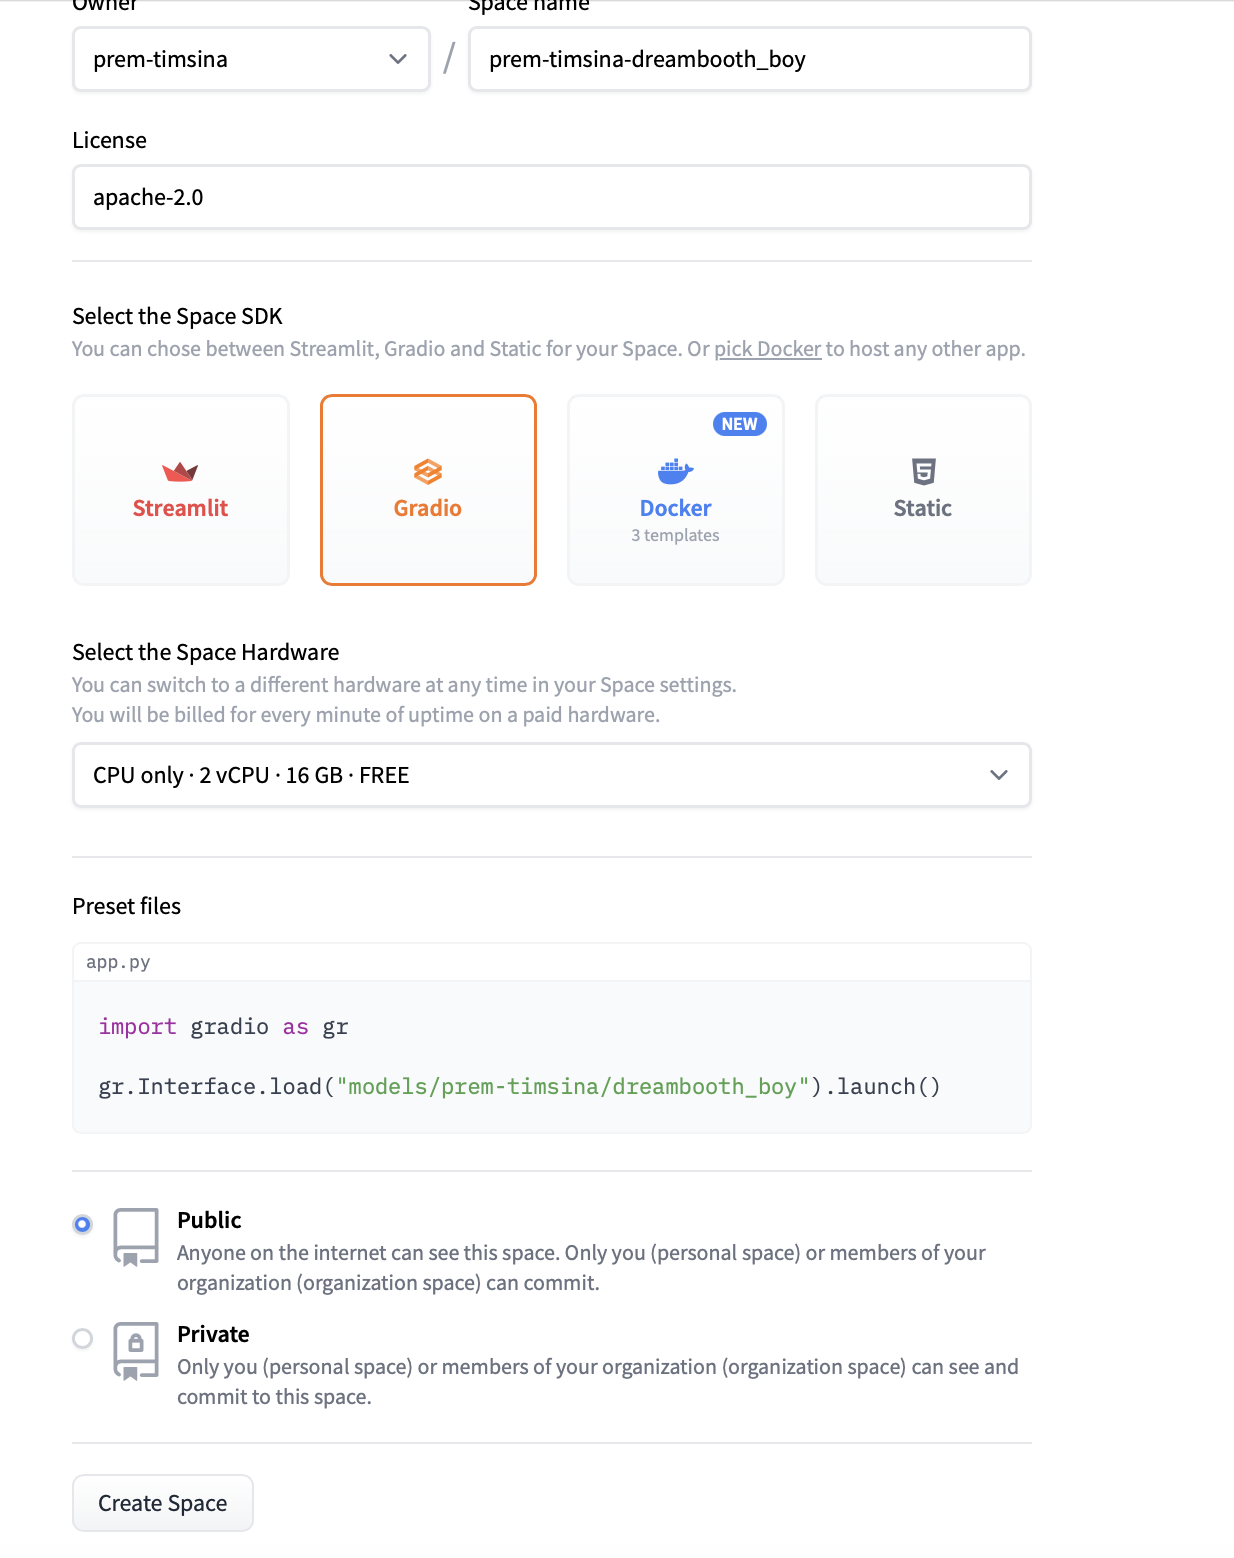



---

---



# ***Your space is running. You will see something like in below diagram.***

---

---





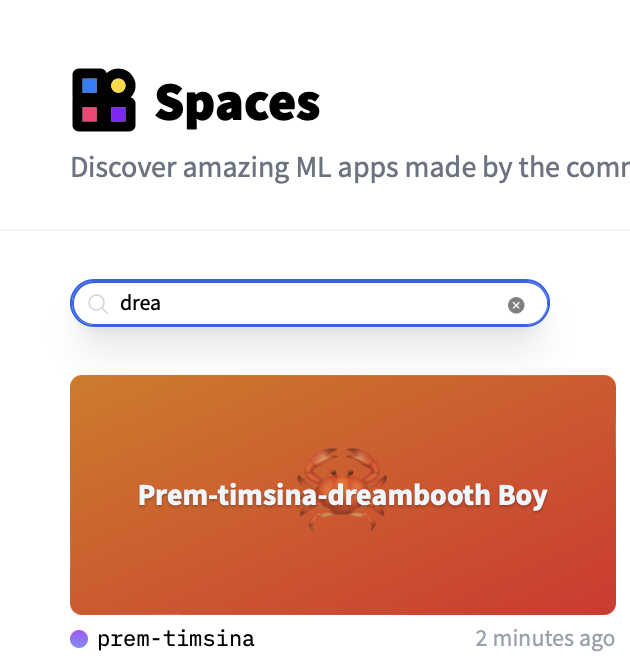